# Final Code

Importing different libraries

In [1]:
import pandas as pd
import numpy as np
import inflect
p = inflect.engine()
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# build a simple linear regression in python
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.style.use('seaborn')
sns.set(style="white")
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
from math import exp
from scipy import stats
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
import warnings
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
pd.set_option("display.max_columns", None)

Creating bball dataframe to make changes to. Creating bball2 dataframe to have a copy of the original dataframe to make interpretations of the data. 

In [2]:
df_stat = pd.read_csv('Seasons_Stats.csv')
df = pd.read_csv('all_seasons.csv')
df.season = df.season.map(lambda x : x[:4])
df.set_index('player_name', inplace=True)
df_stat.set_index(['Player'], inplace=True)
df_stat.drop('Unnamed: 0', axis=1,inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True)
bball = df.join(df_stat, how='left')
bball2 = df.join(df_stat, how='left')

# Making visualizations to interperet original dataset. (bball2)

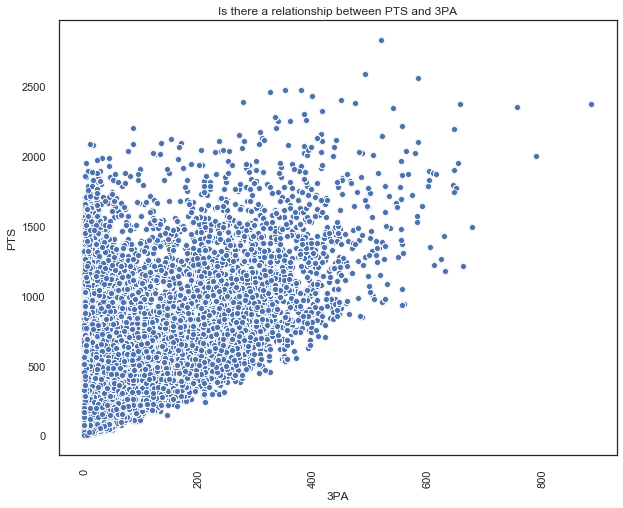

In [3]:
scattering, names = plt.subplots(figsize=(10, 8))
names.set(xlabel='3 Point Attempts', ylabel= 'PTS per Season', title='Is there a relationship between PTS and 3PA')
regress = sns.scatterplot(x='3PA', y='PTS', data=bball2)
plt.xticks(rotation=90)
#Unhash below to download chart
scattering.savefig('3PA_PTS_bball2.png', bbox_inches='tight')
#We see a somewhat linear relationship between 3PA and PTS. 

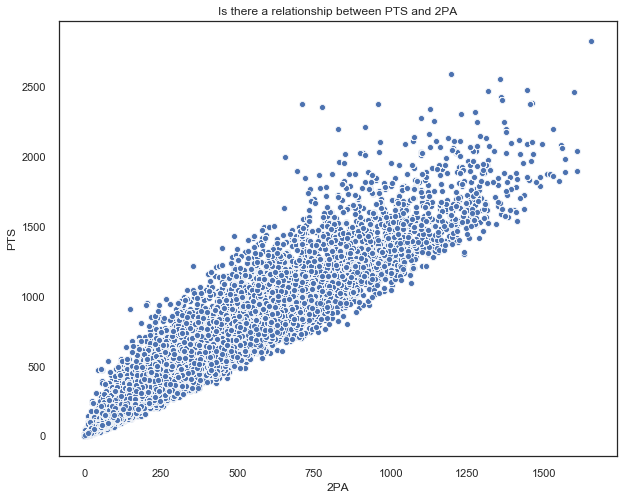

In [4]:
scattering, names = plt.subplots(figsize=(10, 8))
names.set(xlabel='2 Point Attempts', ylabel= 'PTS per Season', title='Is there a relationship between PTS and 2PA')
regress = sns.scatterplot(x='2PA', y='PTS', data=bball2)

#We see a linear relationship between 2PA and PTS.
scattering.savefig('2PA_PTS_bball2.png', bbox_inches='tight')

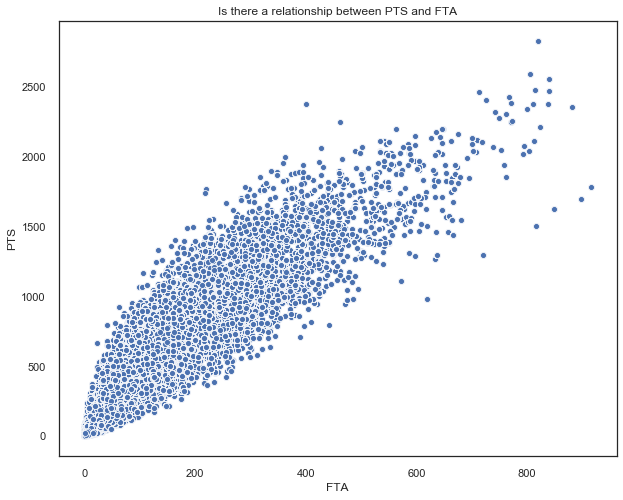

In [5]:
scattering, names = plt.subplots(figsize=(10, 8))
names.set(xlabel='Free Throw Attempts', ylabel= 'PTS per Season', title='Is there a relationship between PTS and FTA')
regress = sns.scatterplot(x='FTA', y='PTS', data=bball2)
#We see a linear relationship between FTA and PTS.
scattering.savefig('FTA_PTS_bball2.png', bbox_inches='tight')

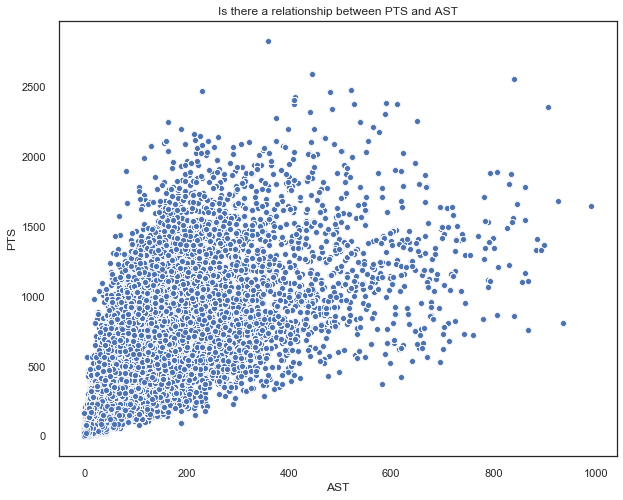

In [6]:
scattering, names = plt.subplots(figsize=(10, 8))
names.set(xlabel='Assits', ylabel= 'PTS per Season',title='Is there a relationship between PTS and AST')
regress = sns.scatterplot(x='AST', y='PTS', data=bball2)
#We see a somewhat linear relationship between AST and PTS. 
scattering.savefig('AST_PTS_bball2.png', bbox_inches='tight')


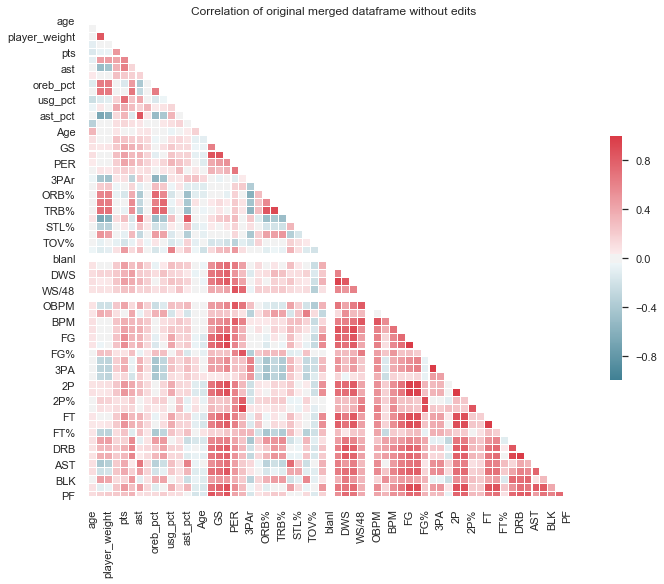

In [7]:
sns.set(style="white")
corr = bball2.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax.set(title='Correlation of original merged dataframe without edits')
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,vmin=-1, center=0,
            square=True, linewidths=.1, cbar_kws={"shrink": .5})
f.savefig('corr_bball2.png', bbox_inches='tight')

#This is a correlation diagonal map. This displays the correlations between features to help decide what to drop. 

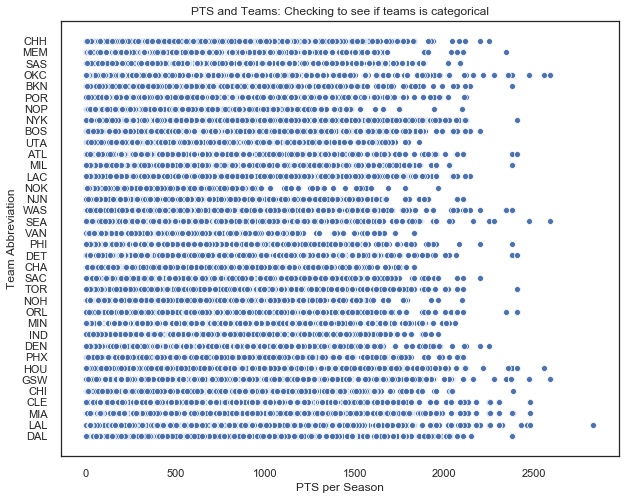

In [8]:
scattering, names = plt.subplots(figsize=(10, 8))
regress = sns.scatterplot(x='PTS', y='team_abbreviation', data=bball2)
names.set(xlabel='PTS per Season', ylabel= 'Team Abbreviation', title='PTS and Teams: Checking to see if teams is categorical')
scattering = plt.gcf()
scattering.savefig('team_PTS_bball2.png', bbox_inches='tight');
# Plots of amount of points score by a player while they played for a team per season. Checking to see if the teams variable is categorical, which I conclude it is. 

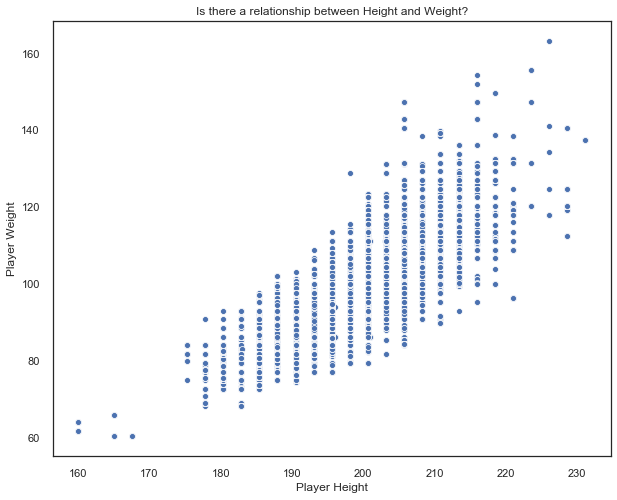

In [9]:
scattering, names = plt.subplots(figsize=(10, 8))
regress = sns.scatterplot(x='player_height', y='player_weight', data=bball2)
names.set(xlabel='Player Height', ylabel= 'Player Weight', title='Is there a relationship between Height and Weight?')
scattering = plt.gcf()
scattering.savefig('Height_weight.png', bbox_inches='tight');
#I was checking to see if there was an overall somwhat proportional relationship between the two variables

Cleaning bball dataframe. Creating dummy variables for team names, position played, and draft round. Also the three point line was created in 1979 so I only take observations from 1980 and above. I also creaate the BMI feature.

In [10]:
bball= bball[bball.PTS >=0]
bball.reset_index(inplace=True)
bball =bball[(bball.net_rating>-200)&(bball.net_rating<300)]
bball.drop(['gp', 'pts', 'reb', 'ast', 'net_rating','oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season','college',"Tm",'draft_year','index','country','draft_number','FGA','age'], axis=1, inplace=True)
missing_titles = []
complete_titles = []
for i in bball.columns:
    if bball[i].isna().sum() != 0:
        missing_titles.append(i)
    else:
        complete_titles.append(i)
bball.fillna(0)
bball.drop(['blank2'],axis=1,inplace=True)
bball.drop(['blanl'],axis=1,inplace=True)
bball.Pos = bball.Pos.map(lambda x: x.replace(" ",""))
bball.draft_round.value_counts()
bball.draft_round = bball.draft_round.map(lambda x: p.number_to_words(x))
bball.columns = bball.columns.map(lambda x: x.replace("%","percent"))
bball.drop(['3PAr','WS/48'],axis=1,inplace=True)
bball.columns = bball.columns.map(lambda x: x.replace("3","three"))
bball.columns = bball.columns.map(lambda x: x.replace("2","two"))
#Creating the BMI feature
bball['player_BMI_denom'] = bball['player_height']/100
bball['player_BMI_denom'] = bball['player_BMI_denom']**2
bball['player_BMI'] = bball['player_weight']/bball['player_BMI_denom']
#Creating dummies
bball = pd.get_dummies(bball, columns=['team_abbreviation', 'Pos','draft_round'])
bball.columns = bball.columns.map(lambda x: x.replace(" ",""))
bball.drop(['FGpercent','FG','FGpercent','threeP','twoP','eFGpercent','FT',], axis=1, inplace=True)
bball.drop(['Age','threePpercent','FTpercent','ASTpercent','STLpercent','BLKpercent','BLKpercent','TOVpercent','USGpercent','twoPpercent','ORBpercent','DRBpercent','TRBpercent','TRB','BPM','DBPM','OBPM','FTr','TSpercent','VORP','WS','G','player_BMI_denom'],axis=1,inplace=True)
bball = bball[bball['Year']>1979]

Checking for correlations in new dataframe greater than 0.9.

In [11]:
correl = bball.copy()
correl.drop(['PTS'],axis=1,inplace=True)
stuff=correl.corr().abs().stack().reset_index().sort_values(0, ascending=False)
stuff['pairs'] = list(zip(stuff.level_0, stuff.level_1))
stuff.set_index(['pairs'], inplace = True)
stuff.drop(columns=['level_1', 'level_0'], inplace = True)
stuff.columns = ['cc']
stuff.drop_duplicates(inplace=True)
stuff[(stuff.cc>.7) & (stuff.cc <1)]

,cc
pairs,
"(FTA, twoPA)",0.891898
"(TOV, MP)",0.887696
"(twoPA, MP)",0.886556
"(TOV, twoPA)",0.880913
"(TOV, FTA)",0.866688
"(GS, MP)",0.866421
"(MP, PF)",0.854622
"(MP, STL)",0.845945
"(DWS, DRB)",0.845679


Regression of current bball columns.

In [12]:
xregress = bball.columns[bball.columns != 'PTS']
from statsmodels.formula.api import ols
outcome = 'PTS'
x_cols = xregress
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=bball).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PTS   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.060e+06
Date:                Sun, 21 Jun 2020   Prob (F-statistic):               0.00
Time:                        03:22:10   Log-Likelihood:            -4.7891e+05
No. Observations:              109456   AIC:                         9.580e+05
Df Residuals:                  109390   BIC:                         9.586e+05
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              -807.5657     22.689    -35.593      0.000    -852.035    -763.096
player_height            -0.7547      0.095     -7.984      0.000      -0.940      -0.569
player_weight             0.6017      0.098      6.135      0.000       0.409       0.794
Year                      0.5419      0.009     57.142      0.000       0.523       0.561
GS                        0.0171      0.004      4.147      0.000       0.009       0.025
MP                        0.0060      0.000     20.945      0.000       0.005       0.007
PER                       0.3289      0.015     21.573      0.000       0.299       0.359
OWS                      38.4044      0.063    605.001      0.000      38.280      38.529
DWS                       1.4157      0.105     13.482      0.000       1.210       1.621
threePA                   0.9301      0.001    969.815      0.000       0.928       0.932
twoPA                     0.9069      0.001   1517.772      0.000       0.906       0.908
FTA                       0.3530      0.001    260.759      0.000       0.350       0.356
ORB                      -0.4127      0.002   -168.111      0.000      -0.418      -0.408
DRB                       0.0375      0.001     28.543      0.000       0.035       0.040
AST                      -0.3840      0.001   -293.782      0.000      -0.387      -0.381
STL                      -0.0746      0.004    -19.193      0.000      -0.082      -0.067
BLK                      -0.0109      0.003     -3.866      0.000      -0.016      -0.005
TOV                       1.1425      0.004    287.157      0.000       1.135       1.150
player_BMI               -2.5048      0.396     -6.327      0.000      -3.281      -1.729
team_abbreviation_ATL   -22.1265      0.707    -31.309      0.000     -23.512     -20.741
team_abbreviation_BKN   -19.6179      0.912    -21.508      0.000     -21.406     -17.830
team_abbreviation_BOS   -23.6130      0.696    -33.908      0.000     -24.978     -22.248
team_abbreviation_CHA   -19.4621      0.746    -26.086      0.000     -20.924     -18.000
team_abbreviation_CHH   -21.1464      0.821    -25.771      0.000     -22.755     -19.538
team_abbreviation_CHI   -21.6013      0.712    -30.353      0.000     -22.996     -20.206
team_abbreviation_CLE   -24.2080      0.698    -34.693      0.000     -25.576     -22.840
team_abbreviation_DAL   -23.9945      0.691    -34.726      0.000     -25.349     -22.640
team_abbreviation_DEN   -22.2360      0.715    -31.106      0.000     -23.637     -20.835
team_abbreviation_DET   -25.5779      0.705    -36.257      0.000     -26.961     -24.195
team_abbreviation_GSW   -20.3138      0.697    -29.128      0.000     -21.681     -18.947
team_abbreviation_HOU   -24.0802      0.709    -33.973      0.000     -25.469     -22.691
team_abbreviation_IND  

# Creating graphics with bball 

Creating columns for correlation data visualizations without dummy variables

In [13]:
column = bball.columns[:20]
bball_corr = bball[column]

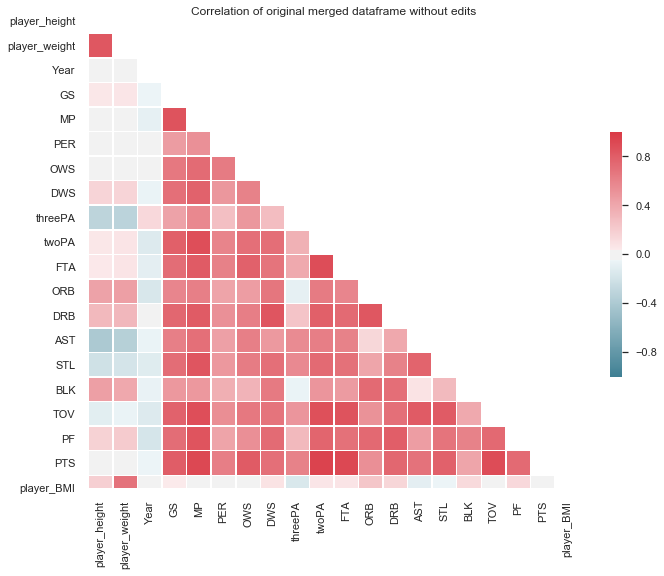

In [14]:
sns.set(style="white")
corr = bball_corr.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
ax.set(title='Correlation of original merged dataframe without edits')
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
f.savefig('corr_bball.png', bbox_inches='tight');
#This is a correlation diagonal map, which displays the correlations after dropping the variables 

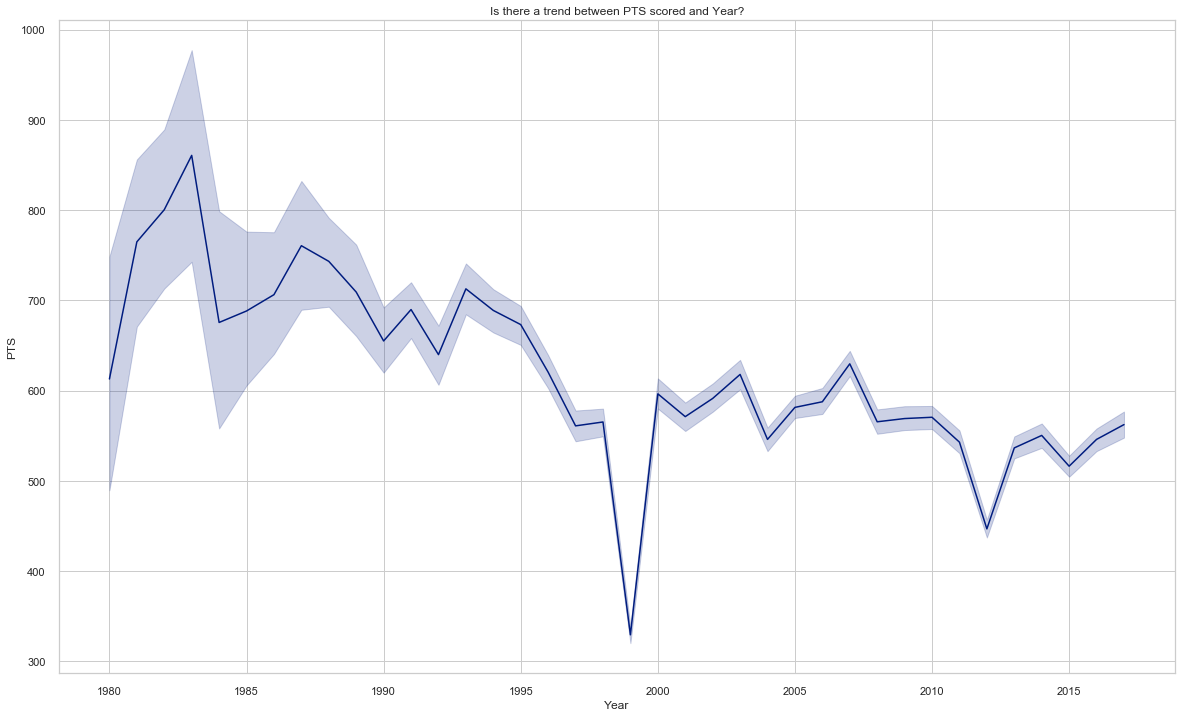

In [15]:
sns.set()
sns.set(style="whitegrid",palette="dark")
fizer, line = plt.subplots(figsize=(20, 12))
line.set(xlabel='Year', ylabel= 'PTS per Season', title='Is there a trend between PTS scored and Year?')
sns.lineplot(x="Year", y="PTS", data=bball, palette='GnBu_d')
fizer.savefig('Year_PTS_bball.png', bbox_inches='tight');
#Trying to visualize the overall relationship of the amount of points scored during a season and the year. As you can see around 1998 there was a major dip, this was due to the lockdown that that shortened the season to 50 games. 

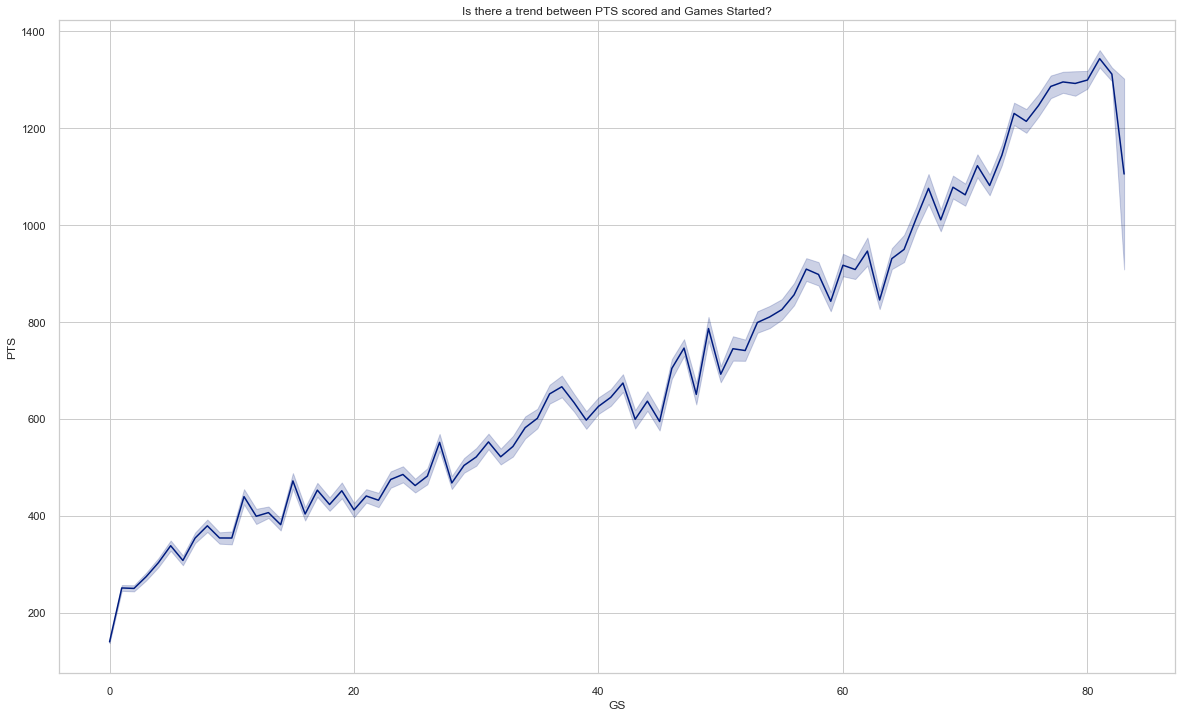

In [16]:

sns.set(style="whitegrid",palette="dark")
fizer, line = plt.subplots(figsize=(20, 12))
line.set(xlabel='Games Started', ylabel= 'PTS per Season', title='Is there a trend between PTS scored and Games Started?')
sns.lineplot(x="GS", y="PTS", data=bball, palette='GnBu_d')
fizer.savefig('PTS_GS_bball.png', bbox_inches='tight');
# Wanted to see the overall relationship of starters scoring the most points. 
#As you can see, the more games you start, generally the more points you score. 

In [17]:
bball

,player_height,player_weight,Year,GS,MP,PER,OWS,DWS,threePA,twoPA,FTA,ORB,DRB,AST,STL,BLK,TOV,PF,PTS,player_BMI,team_abbreviation_ATL,team_abbreviation_BKN,team_abbreviation_BOS,team_abbreviation_CHA,team_abbreviation_CHH,team_abbreviation_CHI,team_abbreviation_CLE,team_abbreviation_DAL,team_abbreviation_DEN,team_abbreviation_DET,team_abbreviation_GSW,team_abbreviation_HOU,team_abbreviation_IND,team_abbreviation_LAC,team_abbreviation_LAL,team_abbreviation_MEM,team_abbreviation_MIA,team_abbreviation_MIL,team_abbreviation_MIN,team_abbreviation_NJN,team_abbreviation_NOH,team_abbreviation_NOK,team_abbreviation_NOP,team_abbreviation_NYK,team_abbreviation_OKC,team_abbreviation_ORL,team_abbreviation_PHI,team_abbreviation_PHX,team_abbreviation_POR,team_abbreviation_SAC,team_abbreviation_SAS,team_abbreviation_SEA,team_abbreviation_TOR,team_abbreviation_UTA,team_abbreviation_VAN,team_abbreviation_WAS,Pos_C,Pos_C-PF,Pos_C-SF,Pos_PF,Pos_PF-C,Pos_PF-SF,Pos_PG,Pos_PG-SF,Pos_PG-SG,Pos_SF,Pos_SF-PF,Pos_SF-PG,Pos_SF-SG,Pos_SG,Pos_SG-PF,Pos_SG-PG,Pos_SG-SF,draft_round_eight,draft_round_four,draft_round_one,draft_round_seven,draft_round_six,draft_round_three,draft_round_two,draft_round_zero
0,205.74,102.05820,1986.0,1.0,1542.0,11.8,1.4,2.0,6.0,382.0,167.0,160.0,221.0,54.0,49.0,49.0,99.0,229.0,521.0,24.110734,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,205.74,102.05820,1987.0,72.0,2240.0,15.7,4.3,3.3,5.0,582.0,282.0,210.0,405.0,84.0,70.0,80.0,102.0,171.0,852.0,24.110734,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,205.74,102.05820,1988.0,64.0,2636.0,14.5,4.5,3.4,2.0,638.0,379.0,245.0,465.0,93.0,87.0,45.0,120.0,204.0,937.0,24.110734,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,205.74,102.05820,1989.0,82.0,2510.0,17.8,5.8,3.5,17.0,741.0,359.0,258.0,481.0,103.0,94.0,55.0,119.0,172.0,1088.0,24.110734,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,205.74,102.05820,1990.0,82.0,2709.0,14.7,4.4,3.3,46.0,760.0,370.0,262.0,450.0,90.0,66.0,50.0,116.0,207.0,1061.0,24.110734,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109720,220.98,117.93392,2007.0,78.0,2130.0,18.0,2.6,4.0,1.0,792.0,192.0,242.0,357.0,123.0,48.0,98.0,141.0,257.0,925.0,24.150871,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
109721,220.98,117.93392,2008.0,73.0,2222.0,18.7,2.9,3.2,1.0,878.0,243.0,263.0,419.0,104.0,34.0,120.0,135.0,247.0,1029.0,24.150871,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
109722,220.98,117.93392,2009.0,65.0,1765.0,18.0,2.1,3.5,39.0,685.0,174.0,157.0,333.0,64.0,28.0,84.0,90.0,183.0,838.0,24.150871,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
109723,220.98,117.93392,2010.0,6.0,1339.0,11.9,0.5,2.0,23.0,415.0,101.0,114.0,231.0,48.0,14.0,50.0,63.0,183.0,474.0,24.150871,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


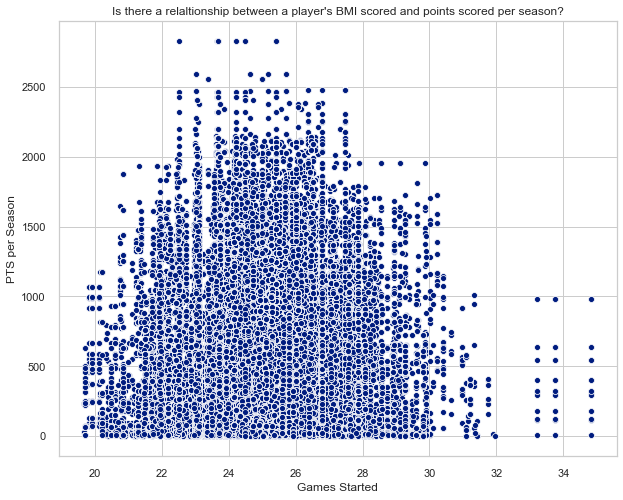

In [18]:
scattering, names = plt.subplots(figsize=(10, 8))
regress = sns.scatterplot(x='player_BMI', y='PTS', data=bball)
names.set(xlabel='Games Started', ylabel= 'PTS per Season', title="Is there a relaltionship between a player's BMI scored and points scored per season?")
scattering = plt.gcf()
scattering.savefig('BMI_bball.png', bbox_inches='tight');
#Player BMI and PTS. Players with BMI between approximate 23 and 27 score the most points per season. 

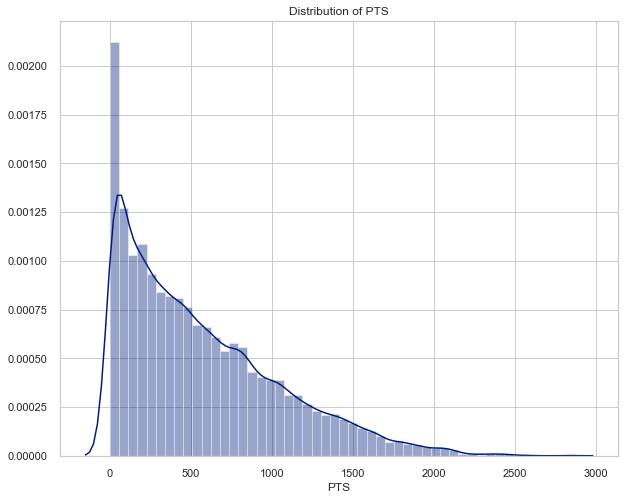

In [19]:
scattering, names = plt.subplots(figsize=(10, 8))
names.set(xlabel='PTS per Season', title="Distribution of PTS")
sns.distplot(bball['PTS'])
scattering.savefig('PTS_dist_bball.png', bbox_inches='tight');
#Distribution of PTS. We see that the distribution of PTS is highly skewed to the right. 

Utilizing the central limit theorem. 

In [20]:
def get_sample(data, n):
    sample = []
    while len(sample) != n:
        x = np.random.choice(data)
        sample.append(x)
    
    return sample
def get_sample_mean(sample):
    return sum(sample) / len(sample)

# 45.3 (This will also change if you run it multiple times)
def create_sample_distribution(data, dist_size=100, n=30):
    sample_dist = []
    while len(sample_dist) != dist_size:
        sample = get_sample(data, n)
        sample_mean = get_sample_mean(sample)
        sample_dist.append(sample_mean)
    
    return sample_dist


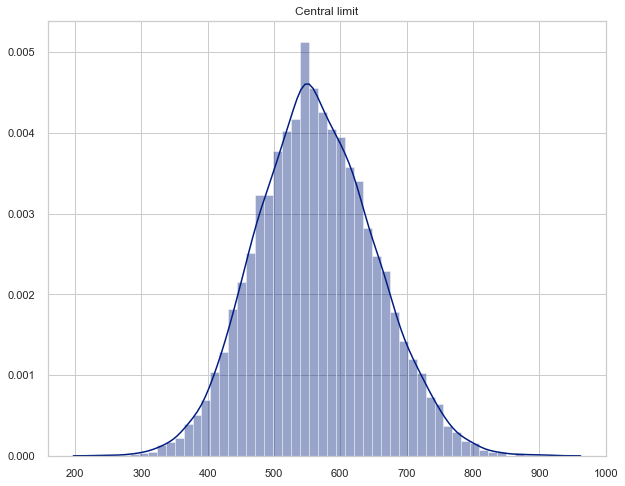

In [21]:
scattering, names = plt.subplots(figsize=(10, 8))
sample_dist_1000 = create_sample_distribution(bball['PTS'], 10000, 30)
names.set(title="Central limit")
sns.distplot(sample_dist_1000)
scattering.savefig('Central_limit.png', bbox_inches='tight');

### Test whether there is a statistically significant difference in mean of PTS scored among teams

Anova test

Ho: The mean of points scored per season between all the teams is the same

Ha : The mean of points scored per season between all the teams is not

In [22]:

import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'PTS ~ C(team_abbreviation)'
lm = ols(formula, bball2).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                            sum_sq        df          F         PR(>F)
C(team_abbreviation)  2.515823e+08      35.0  31.119818  6.418541e-205
Residual              2.533600e+10  109689.0        NaN            NaN


Since the P value falls below an alpha of 0.05, we reject the null hypothesis. Therefore, there is a statistically significant difference between the points scored between teams. 

### Test whether there is a statistically significant difference in the mean of PTS scored per season based on the country of origin

Anova test

Ho: The mean of points scored per season between all the country is the same

Ha : The mean of points scored per season between all the country is not

In [23]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'PTS ~ C(country)'
lm = ols(formula, bball2).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                  sum_sq        df         F    PR(>F)
C(country)  1.603175e+05      75.0  0.009584  0.922014
Residual    2.445709e+10  109656.0       NaN       NaN


/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 75, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)


Since the P value does not fall below an alpha of 0.05, we fail to reject the null hypothesis that there is a statistically significant difference between the points scored between country of origin. 

### Two sample ttest 

Players that played in the 1980's and 1990's  era score more points on average than the one's from 2000's

Ho : mu 1900's points less than or equal to mu 2000's points

Ha: mu 1900's points more than mu 2000's points

In [24]:
two_thousands = bball[bball['Year']>=2000]
nineteenth = bball2[(bball2['Year']<2000)]

In [25]:
mu_1 = two_thousands.PTS.mean()
std_1= two_thousands.PTS.std()/len(two_thousands)
std_1

0.005462346071421661

In [26]:
mu_2 = nineteenth.PTS.mean()
std_2= nineteenth.PTS.std()/len(nineteenth)
std_2

0.022525715315155976

In [27]:
(mu_2-mu_1)/np.sqrt(std_1+std_2)

96.77614770280837

In [28]:
dof = len(two_thousands)+len(nineteenth)-2
dof

109710

The t-test pvalue is less than 0.001, therefore it falls below the rejection region of 0.05. We reject the null hypothesis. Thereby, players who played in the 80's and 90's scored more point on average than those in the 2000's.  

# Initial Regression/ Modeling

In [29]:
bball.fillna(0,inplace=True)

Linear regression with Train Test Split. 80% Training. 20% Testing.

In [30]:
subset = xregress
df_features = bball[subset]
target = bball['PTS']
def linear_regression(df_features,target):
    lm = LinearRegression()
    lm = lm.fit(df_features,target)
    X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state = 34, test_size=0.2)#
    lm = LinearRegression()
    lm = lm.fit(X_train, y_train)
    y_train_pred = lm.predict(X_train)
    mae = metrics.mean_absolute_error(y_train, y_train_pred)
    mse = metrics.mean_squared_error(y_train, y_train_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
    y_test_pred = lm.predict(X_test)
    mae2 = metrics.mean_absolute_error(y_test, y_test_pred)
    mse2 = metrics.mean_squared_error(y_test, y_test_pred)
    rmse2 = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    print(lm.intercept_)
    print(lm.coef_)
    print('R^2', lm.score(df_features, target))
    print('Training Mean Absolute Error:', mae )
    print('Training Mean Squared Error:',  mse)
    print('Training Root Mean Squared Error:' , rmse)
    print('Testing Mean Absolute Error:', mae2 )
    print('Testing Mean Squared Error:',  mse2)
    print('Testing Root Mean Squared Error:' , rmse)
linear_regression(df_features,target)

-946.7857991293745
[-8.59307090e-01  6.79259807e-01  5.60418044e-01  2.92170445e-02
  2.69253338e-03  3.30771357e-01  3.84659155e+01  1.47650919e+00
  9.31977458e-01  9.09015568e-01  3.53369347e-01 -4.17881096e-01
  3.77845571e-02 -3.78357857e-01 -7.52536614e-02 -1.39064447e-02
  1.12830464e+00  3.52404400e-02 -2.91404004e+00  6.36400111e-01
  3.23392540e+00 -1.29715356e+00  3.46928317e+00  1.30704529e+00
  8.87156113e-01 -1.85597332e+00 -1.90481869e+00 -1.52151989e-01
 -3.01961146e+00  1.95716050e+00 -1.37496757e+00  9.28336448e-01
 -9.64171923e-01 -3.32224030e+00 -7.07352862e-01 -1.18537149e+00
 -4.35507901e-01 -7.28980819e-01  2.25862151e-01 -2.03235677e+00
 -3.77517277e+00  4.57103621e+00 -1.19065719e+00 -2.29551068e+00
 -2.03564454e-01  1.14418448e+00  3.03001954e+00 -1.74526531e+00
  9.90644674e-01  1.09017962e+00  9.71555289e-01  7.19238260e-01
  1.72561096e+00  2.45960323e+00 -1.15641239e+00  3.62623859e+00
  2.74950126e+00 -2.54897888e-01  2.03391032e+00  7.34162454e+00
  2.40

Polynomial regression to the second degree with Train Test Split. 80% Training. 20% Testing.

In [31]:
subset = xregress
df_features = bball[subset]
target = bball['PTS']
def two_degree_polynomial(df_features,target):
    from sklearn.preprocessing import PolynomialFeatures
    poly = PolynomialFeatures(degree=2, include_bias = False)
    poly_data = poly.fit_transform(df_features)
    poly_columns = poly.get_feature_names(df_features.columns)
    df_poly = pd.DataFrame(poly_data, columns = poly_columns)
    lm_2 = LinearRegression()
    lm_2 = lm_2.fit(df_poly, target)
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(df_poly, target, random_state = 34, test_size=0.2)
    lm = LinearRegression()
    lm = lm.fit(X_train, y_train)
    y_train_pred = lm.predict(X_train)
    mae = metrics.mean_absolute_error(y_train, y_train_pred)
    mse = metrics.mean_squared_error(y_train, y_train_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
    y_test_pred = lm.predict(X_test)
    mae2 = metrics.mean_absolute_error(y_test, y_test_pred)
    mse2 = metrics.mean_squared_error(y_test, y_test_pred)
    rmse2 = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    print('R^2:', lm_2.score(df_poly, target))
    print('Training set - Features:', X_train.shape, 'Target:', y_train.shape)
    print('Training set - Features:', X_test.shape, 'Target:', y_test.shape)
    print('Training Mean Absolute Error:', mae )
    print('Training Mean Squared Error:',  mse)
    print('Training Root Mean Squared Error:' , rmse)
    print('Testing Mean Absolute Error:', mae2 )
    print('Testing Mean Squared Error:',  mse2)
    print('Testing Root Mean Squared Error:' , rmse2)
two_degree_polynomial(df_features,target)

R^2: 0.9991357581656568
Training set - Features: (87610, 3320) Target: (87610,)
Training set - Features: (21903, 3320) Target: (21903,)
Training Mean Absolute Error: 9.83300712314447
Training Mean Squared Error: 200.88813359609586
Training Root Mean Squared Error: 14.173501105799366
Testing Mean Absolute Error: 10.029451014339989
Testing Mean Squared Error: 222.7346559434921
Testing Root Mean Squared Error: 14.924297502512207


I realized that there might be issues with a few features such as three point attempts, two point attempts, and free throw attempts. I wanted to initially create a prediction without any statistics related to scoring and found out that this might hinder my results. 

In [32]:
bball.corr()

,player_height,player_weight,Year,GS,MP,PER,OWS,DWS,threePA,twoPA,FTA,ORB,DRB,AST,STL,BLK,TOV,PF,PTS,player_BMI,team_abbreviation_ATL,team_abbreviation_BKN,team_abbreviation_BOS,team_abbreviation_CHA,team_abbreviation_CHH,team_abbreviation_CHI,team_abbreviation_CLE,team_abbreviation_DAL,team_abbreviation_DEN,team_abbreviation_DET,team_abbreviation_GSW,team_abbreviation_HOU,team_abbreviation_IND,team_abbreviation_LAC,team_abbreviation_LAL,team_abbreviation_MEM,team_abbreviation_MIA,team_abbreviation_MIL,team_abbreviation_MIN,team_abbreviation_NJN,team_abbreviation_NOH,team_abbreviation_NOK,team_abbreviation_NOP,team_abbreviation_NYK,team_abbreviation_OKC,team_abbreviation_ORL,team_abbreviation_PHI,team_abbreviation_PHX,team_abbreviation_POR,team_abbreviation_SAC,team_abbreviation_SAS,team_abbreviation_SEA,team_abbreviation_TOR,team_abbreviation_UTA,team_abbreviation_VAN,team_abbreviation_WAS,Pos_C,Pos_C-PF,Pos_C-SF,Pos_PF,Pos_PF-C,Pos_PF-SF,Pos_PG,Pos_PG-SF,Pos_PG-SG,Pos_SF,Pos_SF-PF,Pos_SF-PG,Pos_SF-SG,Pos_SG,Pos_SG-PF,Pos_SG-PG,Pos_SG-SF,draft_round_eight,draft_round_four,draft_round_one,draft_round_seven,draft_round_six,draft_round_three,draft_round_two,draft_round_zero
player_height,1.000000,0.841689,-0.004021,0.056944,-0.022021,0.034590,-0.020616,0.163213,-0.306455,0.059024,0.050389,0.432396,0.312049,-0.402739,-0.208575,0.448963,-0.104407,0.179219,-0.025203,0.192235,0.007501,0.001999,-0.007761,-0.010903,0.005061,0.002484,0.012917,0.012721,-0.016577,0.002316,0.003501,-0.017821,0.037873,-0.020233,0.006586,-0.005475,-0.008223,0.004030,-0.000459,-0.009519,0.001865,-0.002288,-0.006043,0.013351,-0.007254,-0.023457,0.008340,0.000345,0.008346,0.001806,-0.006740,0.015044,-0.003931,0.000654,-0.010466,0.001646,0.541872,0.031427,-0.000016,0.341566,0.034809,0.014615,-0.722895,0.002697,-0.048755,0.087608,0.018323,NaN,-0.004801,-0.240846,0.004908,-0.040516,-0.011589,0.011109,0.021115,0.133651,-0.013388,-0.003690,0.007593,-0.019650,-0.167673
player_weight,0.841689,1.000000,-0.010217,0.065662,-0.010681,0.038231,-0.012475,0.163225,-0.318991,0.077998,0.077915,0.452595,0.314864,-0.351154,-0.186989,0.405960,-0.061404,0.205266,-0.012407,0.689000,0.014473,0.010291,0.009800,-0.004359,0.015572,-0.008795,0.026600,-0.001649,-0.021451,-0.001455,-0.000551,-0.019021,0.027659,-0.002137,0.005680,-0.006575,-0.003959,0.000145,-0.011631,-0.013864,0.000013,-0.006239,-0.009975,0.014629,0.005422,-0.021905,0.005880,-0.004550,-0.018278,0.011075,-0.004112,0.006690,-0.010016,0.018248,-0.005643,0.003653,0.541729,0.027127,-0.001073,0.357665,0.029396,0.009187,-0.636422,-0.002651,-0.046787,0.005171,0.016644,NaN,-0.015219,-0.263536,-0.001896,-0.034648,-0.012691,-0.005149,0.024503,0.116297,-0.005227,-0.010799,0.011481,-0.010879,-0.153819
Year,-0.004021,-0.010217,1.000000,-0.047577,-0.081586,-0.010510,-0.013620,-0.057120,0.139591,-0.128476,-0.101035,-0.160430,-0.022788,-0.056437,-0.123330,-0.067365,-0.125539,-0.176467,-0.054079,-0.007930,0.009420,0.076930,0.000029,0.043600,-0.107824,0.007610,0.000895,-0.013771,0.011419,-0.007506,0.006319,-0.004386,0.002193,0.007927,0.003456,0.071395,-0.006596,-0.000705,-0.003665,-0.056663,0.020801,0.007665,0.079526,-0.019743,0.086332,-0.004026,-0.000250,-0.011376,-0.013425,0.009154,-0.013751,-0.071938,-0.013525,0.007007,-0.086426,0.006234,0.029094,0.004549,0.001030,-0.040110,0.001793,0.010978,-0.022911,-0.003317,0.010229,0.004102,0.013710,NaN,0.000580,0.027803,0.005768,0.014697,-0.002829,-0.046289,-0.068607,0.020908,-0.038621,-0.046306,-0.081620,-0.012005,0.013508
GS,0.056944,0.065662,-0.047577,1.000000,0.866082,0.467961,0.659476,0.703408,0.437536,0.795590,0.723915,0.586446,0.757211,0.622172,0.721580,0.485397,0.780479,0.720181,0.805759,0.046218,-0.005991,0.002190,0.022798,-0.016794,0.011925,-0.006930,-0.007171,0.035219,-0.015493,0.009874,0.004526,-0.009601,-0.006477,-0.007352,0.015282,0.008537,0.017628,-0.011814,-0.004906,-0.011459,-0.005909,-0.009321,-0.008908,0.009071,0.009988,0.002842,-0.022684,0.008981,0.006867,-0.006820,0.023628,-0.

In [33]:
xregress = bball.columns[bball.columns != 'PTS']


In [34]:
no_PTS = bball[xregress]

In [35]:
stuff=no_PTS.corr().abs().stack().reset_index().sort_values(0, ascending=False)
stuff['pairs'] = list(zip(stuff.level_0, stuff.level_1))
stuff.set_index(['pairs'], inplace = True)
stuff.drop(columns=['level_1', 'level_0'], inplace = True)
stuff.columns = ['cc']
stuff.drop_duplicates(inplace=True)
stuff[(stuff.cc>.7) & (stuff.cc <1)]

,cc
pairs,
"(FTA, twoPA)",0.891898
"(TOV, MP)",0.887696
"(twoPA, MP)",0.886556
"(TOV, twoPA)",0.880913
"(TOV, FTA)",0.866688
"(GS, MP)",0.866082
"(MP, PF)",0.854622
"(MP, STL)",0.845945
"(DWS, DRB)",0.845679


# Second Linear Regression/ Modeling 

I decided to drop the variables twoPA', threePA ,FTA because they are strongly related with the actual number of points scored. I wanted to initially create a prediction without any statistics related to scoring and found out that this might hinder my results. I am aware that this will affect my RMSE.

In [36]:
dropped_dummies = bball[bball.columns[:20]]
dropped_dummies.drop(['PTS','twoPA','threePA','FTA'], axis = 1, inplace = True)
df_features = dropped_dummies
target= bball.PTS
def linear_regression(df_features,target):
    lm = LinearRegression()
    lm = lm.fit(df_features,target)
    X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state = 34, test_size=0.2)#
    lm = LinearRegression()
    lm = lm.fit(X_train, y_train)
    y_train_pred = lm.predict(X_train)
    mae = metrics.mean_absolute_error(y_train, y_train_pred)
    mse = metrics.mean_squared_error(y_train, y_train_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
    y_test_pred = lm.predict(X_test)
    mae2 = metrics.mean_absolute_error(y_test, y_test_pred)
    mse2 = metrics.mean_squared_error(y_test, y_test_pred)
    rmse2 = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    print(lm.intercept_)
    print(lm.coef_)
    print('R^2', lm.score(df_features, target))
    print('Training Mean Absolute Error:', mae )
    print('Training Mean Squared Error:',  mse)
    print('Training Root Mean Squared Error:' , rmse)
    print('Testing Mean Absolute Error:', mae2 )
    print('Testing Mean Squared Error:',  mse2)
    print('Testing Root Mean Squared Error:' , rmse)
linear_regression(df_features,target)

-302.0101423115532
[-3.09856617e+00  3.72811997e+00  4.16457355e-01 -3.16515038e-02
  2.87632577e-01  4.96279130e+00  7.13300280e+01 -1.25837416e+01
 -1.28199296e+00  1.48607444e-01 -1.28252668e+00  2.99278997e-01
 -2.51132786e-01  4.80660992e+00 -8.31125103e-01 -1.39691262e+01]
R^2 0.9574272038225909
Training Mean Absolute Error: 69.32155913654168
Training Mean Squared Error: 9927.94847509249
Training Root Mean Squared Error: 99.63909109928939
Testing Mean Absolute Error: 69.65037399886508
Testing Mean Squared Error: 9959.927161655318
Testing Root Mean Squared Error: 99.63909109928939


/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Two degree polynomial 

In [37]:
dropped_dummies = bball[bball.columns[:20]]
dropped_dummies.drop(['PTS','twoPA','threePA','FTA'], axis = 1, inplace = True)
df_features = dropped_dummies
target= bball.PTS
def two_degree_polynomial(df_features,target):
    from sklearn.preprocessing import PolynomialFeatures
    poly = PolynomialFeatures(degree=2, include_bias = False)
    poly_data = poly.fit_transform(df_features)
    poly_columns = poly.get_feature_names(df_features.columns)
    df_poly = pd.DataFrame(poly_data, columns = poly_columns)
    lm_2 = LinearRegression()
    lm_2 = lm_2.fit(df_poly, target)
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(df_poly, target, random_state = 34, test_size=0.2)
    lm = LinearRegression()
    lm = lm.fit(X_train, y_train)
    y_train_pred = lm.predict(X_train)
    mae = metrics.mean_absolute_error(y_train, y_train_pred)
    mse = metrics.mean_squared_error(y_train, y_train_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
    y_test_pred = lm.predict(X_test)
    mae2 = metrics.mean_absolute_error(y_test, y_test_pred)
    mse2 = metrics.mean_squared_error(y_test, y_test_pred)
    rmse2 = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    print('R^2:', lm_2.score(df_poly, target))
    print('Training set - Features:', X_train.shape, 'Target:', y_train.shape)
    print('Training set - Features:', X_test.shape, 'Target:', y_test.shape)
    print('Training Mean Absolute Error:', mae )
    print('Training Mean Squared Error:',  mse)
    print('Training Root Mean Squared Error:' , rmse)
    print('Testing Mean Absolute Error:', mae2 )
    print('Testing Mean Squared Error:',  mse2)
    print('Testing Root Mean Squared Error:' , rmse2)
two_degree_polynomial(df_features,target)

/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


R^2: 0.9930710231963117
Training set - Features: (87610, 152) Target: (87610,)
Training set - Features: (21903, 152) Target: (21903,)
Training Mean Absolute Error: 27.48454635346112
Training Mean Squared Error: 1622.959461500978
Training Root Mean Squared Error: 40.28597102591643
Testing Mean Absolute Error: 27.309383851836703
Testing Mean Squared Error: 1597.077962080096
Testing Root Mean Squared Error: 39.96345783437785


Third degree polynomial 

In [38]:
dropped_dummies = bball[bball.columns[:20]]
dropped_dummies.drop(['PTS','twoPA','threePA','FTA'], axis = 1, inplace = True)
df_features = dropped_dummies
target= bball.PTS
def third_degree_polynomial(df_features, target):
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.model_selection import train_test_split
    poly_3 = PolynomialFeatures(degree=3, include_bias = False)
    poly3_data = poly_3.fit_transform(df_features)
    poly3_columns = poly_3.get_feature_names(df_features.columns)
    df_poly3 = pd.DataFrame(poly3_data, columns = poly3_columns)
    lm_3 = LinearRegression()
    lm_3 = lm_3.fit(df_poly3, target)
    X_train, X_test, y_train, y_test = train_test_split(df_poly3, target, random_state = 34, test_size=0.2)
    lm3 = LinearRegression()
    lm3 = lm3.fit(X_train, y_train)
    y_train_pred = lm3.predict(X_train)
    mae = metrics.mean_absolute_error(y_train, y_train_pred)
    mse = metrics.mean_squared_error(y_train, y_train_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
    y_test_pred = lm3.predict(X_test)
    mae2 = metrics.mean_absolute_error(y_test, y_test_pred)
    mse2 = metrics.mean_squared_error(y_test, y_test_pred)
    rmse2 = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    print('R^2:', lm_3.score(df_poly3, target))
    print('Training set - Features:', X_train.shape, 'Target:', y_train.shape)
    print('Training set - Features:', X_test.shape, 'Target:', y_test.shape)
    print('Training Mean Absolute Error:', mae )
    print('Training Mean Squared Error:',  mse)
    print('Training Root Mean Squared Error:' , rmse)
    print('Testing Mean Absolute Error:', mae2 )
    print('Testing Mean Squared Error:',  mse2)
    print('Testing Root Mean Squared Error:' , rmse2)
third_degree_polynomial(df_features, target)


/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


R^2: 0.9955585495113191
Training set - Features: (87610, 968) Target: (87610,)
Training set - Features: (21903, 968) Target: (21903,)
Training Mean Absolute Error: 21.69740789671923
Training Mean Squared Error: 1031.9181806527292
Training Root Mean Squared Error: 32.12348332066013
Testing Mean Absolute Error: 22.086067029757267
Testing Mean Squared Error: 1075.6583007111262
Testing Root Mean Squared Error: 32.79723007680872


As you can see, the third degree model is producing better results than the linear regression and the two degree polynomial regression. 

Try Lasso third degree

In [39]:
dropped_dummies = bball[bball.columns[:20]]
dropped_dummies.drop(['PTS','twoPA','threePA','FTA'], axis = 1, inplace = True)
df_features = dropped_dummies
target= bball.PTS
def lasso_model(df_features, target):
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.model_selection import train_test_split
    poly_3 = PolynomialFeatures(degree=3, include_bias = False)
    poly3_data = poly_3.fit_transform(df_features)
    poly3_columns = poly_3.get_feature_names(df_features.columns)
    df_poly3 = pd.DataFrame(poly3_data, columns = poly3_columns)
    X_train, X_test, y_train, y_test = train_test_split(df_poly3, target, random_state = 34, test_size=0.2)
    from sklearn.linear_model import Lasso
    lasso1 = Lasso(alpha=.1, normalize=False)
    lasso1.fit(X_train,y_train)
    y_train_lasso1 = lasso1.predict(X_train)
    y_pred_lasso1 = lasso1.predict(X_test)
    train_rmse_lasso1 = metrics.mean_absolute_error(y_train, y_train_lasso1)
    test_rmse_lasso1 = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso1))
    print('Training RMSE Error: '+ str(train_rmse_lasso1) )
    print('Testing RMSE Error: '+ str(test_rmse_lasso1) )
lasso_model(df_features, target)

/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 84106327.11367764, tolerance: 2048539.3577776384
  positive)


Training RMSE Error: 28.281931966270992
Testing RMSE Error: 43.59519527561541


The Lasso is producing worse RMSE error, therefore I concluded that the third degree polynomial is the best model.

Without BMI

In [40]:
dropped_dummies = bball[bball.columns[:20]]
dropped_dummies.drop(['PTS','twoPA','threePA','FTA','player_BMI'], axis = 1, inplace = True)
df_features = dropped_dummies
target= bball.PTS
def third_degree_polynomial(df_features, target):
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.model_selection import train_test_split
    poly_3 = PolynomialFeatures(degree=3, include_bias = False)
    poly3_data = poly_3.fit_transform(df_features)
    poly3_columns = poly_3.get_feature_names(df_features.columns)
    df_poly3 = pd.DataFrame(poly3_data, columns = poly3_columns)
    lm_3 = LinearRegression()
    lm_3 = lm_3.fit(df_poly3, target)
    X_train, X_test, y_train, y_test = train_test_split(df_poly3, target, random_state = 34, test_size=0.2)
    lm3 = LinearRegression()
    lm3 = lm3.fit(X_train, y_train)
    y_train_pred = lm3.predict(X_train)
    mae = metrics.mean_absolute_error(y_train, y_train_pred)
    mse = metrics.mean_squared_error(y_train, y_train_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
    y_test_pred = lm3.predict(X_test)
    mae2 = metrics.mean_absolute_error(y_test, y_test_pred)
    mse2 = metrics.mean_squared_error(y_test, y_test_pred)
    rmse2 = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    print('R^2:', lm_3.score(df_poly3, target))
    print('Training set - Features:', X_train.shape, 'Target:', y_train.shape)
    print('Training set - Features:', X_test.shape, 'Target:', y_test.shape)
    print('Training Mean Absolute Error:', mae )
    print('Training Mean Squared Error:',  mse)
    print('Training Root Mean Squared Error:' , rmse)
    print('Testing Mean Absolute Error:', mae2 )
    print('Testing Mean Squared Error:',  mse2)
    print('Testing Root Mean Squared Error:' , rmse2)
third_degree_polynomial(df_features, target)


/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


R^2: 0.9953676030893909
Training set - Features: (87610, 815) Target: (87610,)
Training set - Features: (21903, 815) Target: (21903,)
Training Mean Absolute Error: 22.093967910179835
Training Mean Squared Error: 1078.1517758558582
Training Root Mean Squared Error: 32.83522157464235
Testing Mean Absolute Error: 22.424947163767797
Testing Mean Squared Error: 1111.6910607651316
Testing Root Mean Squared Error: 33.34203144328689


After taking out the feature BMI I created. The RMSE is higher, therfore I have concluded that the feature actually helps predict my model. 

Without Height and Weight we see that the RMSE highers again, therefore they are key compenents in our model

In [41]:
dropped_dummies = bball[bball.columns[:20]]
dropped_dummies.drop(['PTS','twoPA','threePA','FTA','player_height','player_weight'], axis = 1, inplace = True)
df_features = dropped_dummies
target= bball.PTS
def third_degree_polynomial(df_features, target):
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.model_selection import train_test_split
    poly_3 = PolynomialFeatures(degree=3, include_bias = False)
    poly3_data = poly_3.fit_transform(df_features)
    poly3_columns = poly_3.get_feature_names(df_features.columns)
    df_poly3 = pd.DataFrame(poly3_data, columns = poly3_columns)
    lm_3 = LinearRegression()
    lm_3 = lm_3.fit(df_poly3, target)
    X_train, X_test, y_train, y_test = train_test_split(df_poly3, target, random_state = 34, test_size=0.2)
    lm3 = LinearRegression()
    lm3 = lm3.fit(X_train, y_train)
    y_train_pred = lm3.predict(X_train)
    mae = metrics.mean_absolute_error(y_train, y_train_pred)
    mse = metrics.mean_squared_error(y_train, y_train_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
    y_test_pred = lm3.predict(X_test)
    mae2 = metrics.mean_absolute_error(y_test, y_test_pred)
    mse2 = metrics.mean_squared_error(y_test, y_test_pred)
    rmse2 = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    print('R^2:', lm_3.score(df_poly3, target))
    print('Training set - Features:', X_train.shape, 'Target:', y_train.shape)
    print('Training set - Features:', X_test.shape, 'Target:', y_test.shape)
    print('Training Mean Absolute Error:', mae )
    print('Training Mean Squared Error:',  mse)
    print('Training Root Mean Squared Error:' , rmse)
    print('Testing Mean Absolute Error:', mae2 )
    print('Testing Mean Squared Error:',  mse2)
    print('Testing Root Mean Squared Error:' , rmse2)
third_degree_polynomial(df_features, target)


/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


R^2: 0.9951648367082074
Training set - Features: (87610, 679) Target: (87610,)
Training set - Features: (21903, 679) Target: (21903,)
Training Mean Absolute Error: 22.526456317207938
Training Mean Squared Error: 1126.0399018221035
Training Root Mean Squared Error: 33.556518022913274
Testing Mean Absolute Error: 22.845507733632527
Testing Mean Squared Error: 1156.5338580139623
Testing Root Mean Squared Error: 34.00784994694552
